In [340]:
reset -f

In [341]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [342]:
file_aut = pd.read_csv('author.csv')
file_aut.drop('Unnamed: 0',axis=1,inplace=True)
file_aut.head()

,j_user,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT
0,"{'id': 756431, 'id_str': '756431', 'name': 'Ar...",2.4,3.929377,15.5,32.022648,0.0,0.0
1,"{'id': 1622441, 'id_str': '1622441', 'name': '...",0.2,0.600000,0.8,0.979796,1.0,0.0
2,"{'id': 1770311, 'id_str': '1770311', 'name': '...",17.9,13.626812,37.2,40.931162,21.0,10.0
3,"{'id': 2107671, 'id_str': '2107671', 'name': '...",0.4,0.489898,1.7,3.796051,0.0,0.0
4,"{'id': 3127331, 'id_str': '3127331', 'name': '...",2.3,5.216321,3.4,6.545227,0.0,0.0


In [343]:
Y_FC = file_aut['FC']
Y_RT = file_aut['RT']

In [344]:
# Separem Y_FC entre 5 grups: aquells que tenen menys de 10, aquells que tenen entre 11- 100, 
# aquells que tenen entre 101 - 1000, aquells que tenen entre 1000 i 5000 i aquells que tenen mes de 5000

y0_fc = Y_FC[np.asarray(Y_FC)<=5]
pes0 = (np.asarray(y0_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print('y0',pes0)
hist, bin_edges = np.histogram(y0_fc)
y1_fc = Y_FC[np.asarray(Y_FC)>5]
y1_fc = y1_fc[np.asarray(y1_fc)<=50]
pes1 = 100*(np.asarray(y1_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print('y1:',pes1)
hist, bin_edges = np.histogram(y1_fc)
y2_fc = Y_FC[np.asarray(Y_FC)>50]
#y2_fc = y2_fc[np.asarray(y2_fc)<=1000]
pes2 = 100*(np.asarray(y2_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print('y2:',pes2)
hist, bin_edges = np.histogram(y2_fc)
#y3_fc = Y_FC[np.asarray(Y_FC)>1000]
#y3_fc = y3_fc[np.asarray(y3_fc)<=5000]
#pes3 = 100*(np.asarray(y3_fc).shape[0])/(np.asarray(Y_FC).shape[0])
#print('y3:',pes3)
#hist, bin_edges = np.histogram(y3_fc)
#y4_fc = Y_FC[np.asarray(Y_FC)>5000]
#pes4 = 100*(np.asarray(y4_fc).shape[0])/(np.asarray(Y_FC).shape[0])
#print('y4:',pes4)
#hist, bin_edges = np.histogram(y4_fc)

#print('\n Suma de pesos:', pes0+pes1+pes2+pes3+pes4)
print('\n Suma de pesos:', pes0+pes1+pes2)

y0 0.7888982338099243
y1: 14.171572750210261
y2: 6.938603868797308

 Suma de pesos: 21.899074852817492


In [345]:
# Separem Y_RT entre 5 grups: aquells que tenen menys de 5, aquells que tenen entre 6- 20, 
# aquells que tenen entre 21 - 100, aquells que tenen entre 100 i 500 i aquells que tenen mes de 500

y0_rt = Y_RT[np.asarray(Y_RT)<=5]
pes0 = 100*(np.asarray(y0_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print('y0',pes0)
hist, bin_edges = np.histogram(y0_rt)
y1_rt = Y_RT[np.asarray(Y_RT)>5]
y1_rt = y1_rt[np.asarray(y1_rt)<=20]
pes1 = 100*(np.asarray(y1_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print('y1:',pes1)
hist, bin_edges = np.histogram(y1_rt)
y2_rt = Y_RT[np.asarray(Y_RT)>20]
y2_rt = y2_rt[np.asarray(y2_rt)<=100]
pes2 = 100*(np.asarray(y2_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print('y2:',pes2)
hist, bin_edges = np.histogram(y2_rt)
y3_rt = Y_RT[np.asarray(Y_RT)>100]
y3_rt = y3_rt[np.asarray(y3_rt)<=500]
pes3 = 100*(np.asarray(y3_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print('y3:',pes3)
hist, bin_edges = np.histogram(y3_rt)
y4_rt = Y_RT[np.asarray(Y_RT)>500]
pes4 = 100*(np.asarray(y4_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print('y4:',pes4)
hist, bin_edges = np.histogram(y4_rt)

print('\n Suma de pesos:', pes0+pes1+pes2+pes3+pes4)

y0 87.17409587888983
y1: 6.2657695542472664
y2: 3.280067283431455
y3: 1.7661900756938604
y4: 1.5138772077375946

 Suma de pesos: 100.0


In [346]:
file_aut['class_fc'] = np.zeros(file_aut.shape[0])
file_aut['class_rt'] = np.zeros(file_aut.shape[0])

file_aut['class_fc'][y1_fc.index] = 1
file_aut['class_fc'][y2_fc.index] = 2
#file_aut['class_fc'][y3_fc.index] = 3
#file_aut['class_fc'][y4_fc.index] = 4

file_aut['class_rt'][y1_rt.index] = 1
file_aut['class_rt'][y2_rt.index] = 2
file_aut['class_rt'][y3_rt.index] = 3
file_aut['class_rt'][y4_rt.index] = 4

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A

In [347]:
file_aut.head()

,j_user,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,class_fc,class_rt
0,"{'id': 756431, 'id_str': '756431', 'name': 'Ar...",2.4,3.929377,15.5,32.022648,0.0,0.0,0.0,0.0
1,"{'id': 1622441, 'id_str': '1622441', 'name': '...",0.2,0.600000,0.8,0.979796,1.0,0.0,0.0,0.0
2,"{'id': 1770311, 'id_str': '1770311', 'name': '...",17.9,13.626812,37.2,40.931162,21.0,10.0,1.0,1.0
3,"{'id': 2107671, 'id_str': '2107671', 'name': '...",0.4,0.489898,1.7,3.796051,0.0,0.0,0.0,0.0
4,"{'id': 3127331, 'id_str': '3127331', 'name': '...",2.3,5.216321,3.4,6.545227,0.0,0.0,0.0,0.0


## Fins aquí tenim la base de dades d'author i tweet juntes, i s'han afegit dues columnes segons el grup de rt i el grup de fc

Ara preparem les dades per aplicar el model que separa en grups a author

In [349]:
numl = len(file_aut.index.values)
cols = ['followers_count','friends_count','listed_count','favourites_count','statuses_count']

X_aut = file_aut.copy() #X que utilitzem pel model d'authors

for col in cols:
    X_aut[col]=np.zeros(numl)
for line in range(numl):
    dic = ast.literal_eval(file_aut['j_user'][line])
    for col in cols:
        X_aut[col][line] = int(dic[col])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [350]:
X_aut.drop('j_user',axis=1,inplace=True)
X_aut.drop('FC',axis=1,inplace=True)
X_aut.drop('RT',axis=1,inplace=True)
X_aut.drop('class_fc',axis=1,inplace=True)
X_aut.drop('class_rt',axis=1,inplace=True)

In [351]:
X_aut.head() #son les x
#file['class_rt'] son les y per RT
#file['class_fc'] son les y per FC

,RT_l10,sd_RT,FC_l10,sd_FC,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,2.4,3.929377,15.5,32.022648,19645.0,949.0,662.0,12334.0,55829.0
1,0.2,0.600000,0.8,0.979796,4221.0,281.0,340.0,587.0,13650.0
2,17.9,13.626812,37.2,40.931162,1133925.0,1.0,9745.0,16.0,65228.0
3,0.4,0.489898,1.7,3.796051,5386.0,3861.0,304.0,15325.0,85493.0
4,2.3,5.216321,3.4,6.545227,1072.0,433.0,101.0,899.0,19893.0


## Ara fem el model per determinal el grup

In [352]:
#model to determine which class

#Neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics

#for FC

r_state = [0,1,2,3,4,5,42,43,44,45]

acc_fc = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_aut, file_aut['class_fc'], train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    mlp = MLPClassifier() #MLP
    mlp.fit(X_train_scaled,y_train)
    yhat_mlp = mlp.predict(X_test_scaled) 
    
    acc_fc[i,0] = metrics.accuracy_score(y_test,yhat_mlp)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a15a93198>,
 'caps': [<matplotlib.lines.Line2D at 0x1a15841be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a15a939e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1119cc668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1119cc748>],
 'means': []}

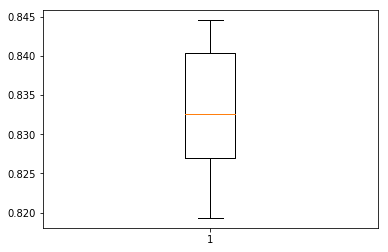

In [353]:
fig = plt.figure()
plt.boxplot(acc_fc)

In [355]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_aut, file_aut['class_fc'], train_size=0.7, random_state=r_state[0])

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

mlp = MLPClassifier() #MLP
mlp.fit(X_train_scaled,y_train)
yhat_mlp = mlp.predict(X_test_scaled) 

print(metrics.classification_report(y_test,yhat_mlp))
print(metrics.confusion_matrix(y_test,yhat_mlp))

             precision    recall  f1-score   support

        0.0       0.84      0.98      0.90       553
        1.0       0.33      0.07      0.12       110
        2.0       0.86      0.71      0.77        51

avg / total       0.76      0.82      0.77       714

[[542   9   2]
 [ 98   8   4]
 [  8   7  36]]


In [333]:
#model to determine which class

#Neural networks
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics

#for RT

r_state = [0,1,2,3,4,5,42,43,44,45]

acc_rt = np.zeros((len(r_state),1))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_aut, file_aut['class_rt'], train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    mlp = MLPClassifier() #MLP
    mlp.fit(X_train_scaled,y_train)
    yhat_mlp = mlp.predict(X_test_scaled) 
    
    acc_rt[i,0] = metrics.accuracy_score(y_test,yhat_mlp)

mlp = MLPClassifier()

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x1119a2e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a15a6edd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1119a24a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a15a4fda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a15a4fef0>],
 'means': []}

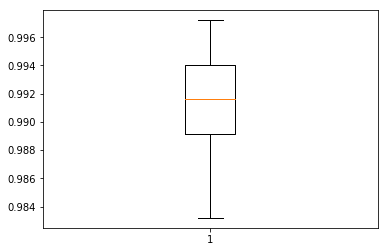

In [334]:
fig = plt.figure()
plt.boxplot(acc_rt)

Els models utilitzats són "sklearn.neural_network.MLPClassifier()" i tenen una accuracy del 88-89% de mitjana:

In [354]:
print("Mean accuracy for FC:",np.mean(acc_fc))
print("Mean accuracy for RT:",np.mean(acc_rt))

Mean accuracy for FC: 0.8334733893557422


NameError: name 'acc_rt' is not defined

In [123]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics

### Model final per class_FC i class_RT:

In [126]:
scaler = StandardScaler()
scaler = scaler.fit(X_aut)

mlp_fc = MLPClassifier()
mlp_fc.fit(scaler.transform(X_aut),file_aut['class_fc'])

mlp_rt = MLPClassifier()
mlp_rt.fit(scaler.transform(X_aut),file_aut['class_rt'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [127]:
X_aut.shape

(2378, 13)

## Model pel text 

In [60]:
## Predim les noves columnes class_RT i class_fc

In [128]:
class_fc = mlp_fc.predict(scaler.transform(X_aut))
class_rt = mlp_fc.predict(scaler.transform(X_aut))

In [228]:
import ast
import re #regular expressions
import unidecode as udc
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from unicodedata import normalize

In [297]:
file_tweet = pd.read_csv('tweet.csv')
file_tweet.drop('Unnamed: 0',axis=1,inplace=True)
file_tweet.head()

,id,Tweet,j_user,created_at,entities,followers_user,FC,RT,trending_topic
0,1046429145914384386,Desde el #FCJumilla damos nuestra más sincera ...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:58:44,"{'hashtags': [{'text': 'FCJumilla', 'indices':...",7162,18,4,0.0
1,1044060298443919367,Me estoy volviendo loca hasta por cada una de ...,"{'id': 713359736, 'id_str': '713359736', 'name...",2018-09-24 03:05:47,"{'hashtags': [], 'symbols': [], 'user_mentions...",531,0,0,0.0
2,1046424001214648320,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:38:18,"{'hashtags': [{'text': 'FCJumilla', 'indices':...",7162,4,2,0.0
3,1046419267279818752,📹 | El vestuario del #FCJumilla en La Condomin...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:19:29,"{'hashtags': [{'text': 'FCJumilla', 'indices':...",7162,21,6,0.0
4,1046417005451128832,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:10:30,"{'hashtags': [{'text': 'UCAMMurciaJumilla', 'i...",7162,0,0,0.0


In [298]:
X_aut.head()

,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,class_fc,class_rt,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,2.4,3.929377,15.5,32.022648,0.0,0.0,0.0,0.0,19645.0,949.0,662.0,12334.0,55829.0
1,0.2,0.600000,0.8,0.979796,1.0,0.0,0.0,0.0,4221.0,281.0,340.0,587.0,13650.0
2,17.9,13.626812,37.2,40.931162,21.0,10.0,1.0,1.0,1133925.0,1.0,9745.0,16.0,65228.0
3,0.4,0.489898,1.7,3.796051,0.0,0.0,0.0,0.0,5386.0,3861.0,304.0,15325.0,85493.0
4,2.3,5.216321,3.4,6.545227,0.0,0.0,0.0,0.0,1072.0,433.0,101.0,899.0,19893.0


In [299]:
#falta afegir els IDs a X_aut 

X_aut_ids = X_aut.copy()
numl = len(file_aut.index.values)
#cols = ['followers_count','friends_count','listed_count','favourites_count','statuses_count']

#X_aut['id'] = np.zeros(numl) #X que utilitzem pel model d'authors
ids = np.zeros(numl)

for line in range(numl):
    dic = ast.literal_eval(file_aut['j_user'][line])
    ids[line] = dic['id']

In [300]:
X_aut_ids.head()

,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,class_fc,class_rt,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,2.4,3.929377,15.5,32.022648,0.0,0.0,0.0,0.0,19645.0,949.0,662.0,12334.0,55829.0
1,0.2,0.600000,0.8,0.979796,1.0,0.0,0.0,0.0,4221.0,281.0,340.0,587.0,13650.0
2,17.9,13.626812,37.2,40.931162,21.0,10.0,1.0,1.0,1133925.0,1.0,9745.0,16.0,65228.0
3,0.4,0.489898,1.7,3.796051,0.0,0.0,0.0,0.0,5386.0,3861.0,304.0,15325.0,85493.0
4,2.3,5.216321,3.4,6.545227,0.0,0.0,0.0,0.0,1072.0,433.0,101.0,899.0,19893.0


In [301]:
numl = len(file_tweet.index.values)
cols = ['Tweet','RT_l10','sd_RT','FC_l10','sd_FC','FC','RT']

X_tweet = pd.DataFrame(columns = cols) #X que utilitzem pel model d'authors

cols = cols[1:]

for col in cols:
    X_tweet[col]=np.zeros(numl)

In [302]:
X_tweet.head()

,Tweet,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:
dic = ast.literal_eval(file_tweet['j_user'][line])
id_tweet = dic['id']
id_tweet

1034744005

In [305]:
compt = 0
for line in range(numl):
    print(line)
    dic = ast.literal_eval(file_tweet['j_user'][line])
    id_tweet = dic['id']
    X_tweet['Tweet'][line] = file_tweet['Tweet'][line]
    try:
        for col in cols:
            X_tweet[col][line] = X_aut_ids[col][id_tweet]
    except ValueError:
        compt += 1
        pass


0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyError: 2664945430

In [ ]:
X_tweet.head()

In [ ]:
X_tweet.to_csv('tweets_newcolumns.csv')

In [ ]:
from sklearn.externals import joblib

def save_model(clf, name):
    filename = 'trained_'+name+'.sav'
    joblib.dump(clf, filename)
    return filename

